# Градиентный бустинг и Случайный лес

Введение
Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

Реализация в sklearn
В пакете scikit-learn градиентный бустинг реализован в модуле ensemble в виде классов GradientBoostingClassifier и GradientBoostingRegressor. Основные параметры, которые будут интересовать нас: n_estimators, learning_rate. Иногда может быть полезен параметр verbose для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод staged_decision_function. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете scikit-learn представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией train_test_split модуля cross_validation. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные X и y, где X — это признаковое описание объектов, y — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:

Метрика log-loss реализована в пакете metrics: sklearn.metrics.log_loss. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:

Метод predict_proba возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = data.drop('Activity',axis=1)
y = data['Activity']

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3199           20.17s
         2           1.2645           16.49s
         3           1.2170           15.48s
         4           1.1775           15.13s
         5           1.1404           14.65s
         6           1.1106           14.27s
         7           1.0844           13.96s
         8           1.0617           13.70s
         9           1.0411           13.60s
        10           1.0223           13.44s
        20           0.8864           11.45s
        30           0.7844           10.05s
        40           0.7176            8.98s
        50           0.6590            8.17s
        60           0.6120            7.54s
        70           0.5599            7.07s
        80           0.5242            6.54s
        90           0.4829            6.10s
       100           0.4473            5.67s
       200           0.2379            1.83s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              n_iter_no_change=None, presort='auto', random_state=241,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

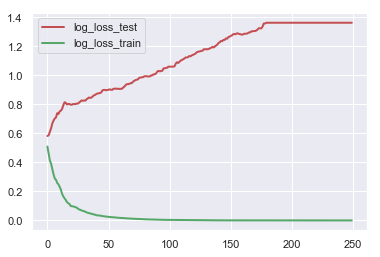

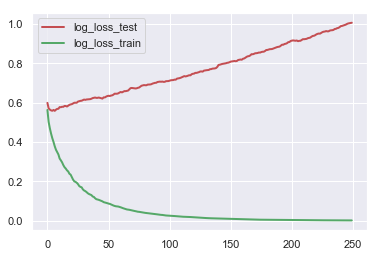

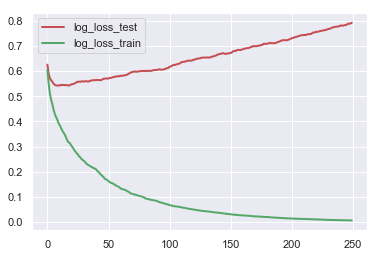

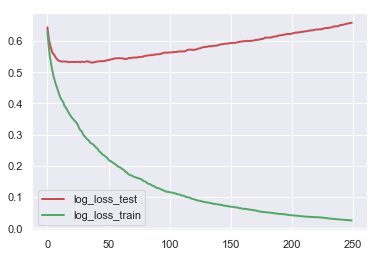

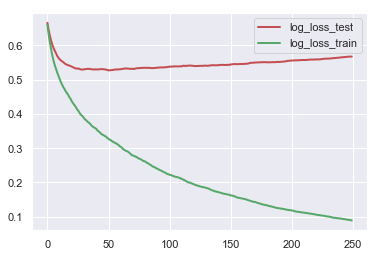

In [30]:
from sklearn.metrics import log_loss
# Reserve an array to store iteration with min log_loss for each learning rate
min_iterations_train = []
min_iterations_test = []
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    model = GradientBoostingClassifier(n_estimators=250, verbose=False, random_state=241, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_train_pred = model.staged_decision_function(X_train)
    y_test_pred = model.staged_decision_function(X_test)

    log_loss_train = []
    for y_t_p in y_train_pred:
        log_loss_train.append(log_loss(y_train, 1 / (1 + np.exp(-y_t_p))))

    log_loss_test = []
    for y_t_p in y_test_pred:
        log_loss_test.append(log_loss(y_test, 1 / (1 + np.exp(-y_t_p))))
    
    # Plot the errors for both TRAIN and TEST sets (w/ the curr Learning Rate)
    plt.figure("GB learning rate: " + str(learning_rate))
    plt.plot(log_loss_test, "r", linewidth=2)
    plt.plot(log_loss_train, "g", linewidth=2)
    plt.legend(["log_loss_test", "log_loss_train"])
    plt.draw()
    
    # Min log-loss and the corresponding iteration
    log_loss_train_min_ind = np.argmin(log_loss_train) + 1
    log_loss_test_min_ind = np.argmin(log_loss_test) + 1
    log_loss_train_min = np.min(log_loss_train)
    log_loss_test_min = np.min(log_loss_test)
    min_iterations_train.append((log_loss_train_min, log_loss_train_min_ind))
    min_iterations_test.append((log_loss_test_min, log_loss_test_min_ind))

In [31]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
for t in zip(min_iterations_train, learning_rate):
    print("min: ", t[0][0], "min_ind: ", t[0][1], "learning rate: ", t[1])

('min: ', 0.00020857611394801512, 'min_ind: ', 181, 'learning rate: ', 1)
('min: ', 0.0010223680763683195, 'min_ind: ', 250, 'learning rate: ', 0.5)
('min: ', 0.0068872910014473624, 'min_ind: ', 250, 'learning rate: ', 0.3)
('min: ', 0.024906124380084917, 'min_ind: ', 250, 'learning rate: ', 0.2)
('min: ', 0.08936962416274086, 'min_ind: ', 250, 'learning rate: ', 0.1)


In [32]:
for t in zip(min_iterations_test, learning_rate):
    print("min: ", t[0][0], "min_ind: ", t[0][1], "learning rate: ", t[1])

('min: ', 0.5822942594278476, 'min_ind: ', 1, 'learning rate: ', 1)
('min: ', 0.5582025523164261, 'min_ind: ', 7, 'learning rate: ', 0.5)
('min: ', 0.5423141110024554, 'min_ind: ', 11, 'learning rate: ', 0.3)
('min: ', 0.5314507963190638, 'min_ind: ', 37, 'learning rate: ', 0.2)
('min: ', 0.5269201872275844, 'min_ind: ', 52, 'learning rate: ', 0.1)


In [48]:
f = open('overfitting.txt', 'w')
f.write('overfitting')
f.close()

In [47]:
p = str(np.round(min_iterations_test[3][0],2))+' '+str(min_iterations_test[3][1])
f = open('log_loss_gb.txt', 'w')
f.write(p)
f.close()

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=min_iterations_test[3][1], random_state=241)

In [42]:
rf_model.fit(X_train,y_train)
log_los_rf = log_loss(y_pred=rf_model.predict_proba(X_test),y_true=y_test)
log_los_rf

0.5410941951182815

In [46]:
f = open('log_loss_rf.txt', 'w')
f.write(str(np.round(log_los_rf,2)))
f.close()